In [1]:
## Importing packages
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

In [2]:
## Generating data
torch.manual_seed(1)
N = 200
true_b0 = 1.5
true_b1 = -2.0

x = torch.randn(N, 1)                   # shape (N, 1)
eps = 0.1 * torch.randn(N, 1)
y = true_b0 + true_b1 * x + eps 

In [3]:
## Forming P matrix
x_bar = x.mean()
x_sq_bar = (x**2).mean()

xy_bar = (x*y).mean()
y_bar = y.mean()

c = torch.tensor([[y_bar],[xy_bar]])

P = torch.tensor([[1.0,x_bar],[x_bar,x_sq_bar]])

β = torch.inverse(P)@c

eigenvalues = torch.linalg.eigvalsh(P)

μ_max = eigenvalues.max().item()

In [4]:
## Divergent case

In [5]:
## define the linear function (neural net)
model = nn.Linear(in_features=1, out_features=1)

with torch.no_grad():
    model.weight.fill_(0.0)   # sets w = 0
    model.bias.fill_(0.0)     # sets b = 0


## setting the optimizer
learning_rate = (1/μ_max)*(1.01)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

b0_list_diverge = []
b1_list_diverge = []

num_steps = 100

for t in range(num_steps):
    b0_hat = model.bias.item()
    b1_hat = model.weight.item()

    # Save them
    b0_list_diverge.append(b0_hat)
    b1_list_diverge.append(b1_hat)

    # Forward pass
    y_pred = model(x)

    # Compute loss
    loss = criterion(y_pred, y)

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Gradient descent update
    optimizer.step()

    # Extract parameters
   

    # Optional printout
    #print(f"step {t:4d} | loss = {loss:.5f} | b0 = {b0_hat:.3f}, b1 = {b1_hat:.3f}")

b0_array_div = np.array(b0_list_diverge)
b1_array_div = np.array(b1_list_diverge)

In [6]:
## Convergant case

In [7]:
## define the linear function (neural net)
model = nn.Linear(in_features=1, out_features=1)

with torch.no_grad():
    model.weight.fill_(0.0)   # sets w = 0
    model.bias.fill_(0.0)     # sets b = 0


## setting the optimizer
learning_rate = (1/μ_max)*(0.9)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

b0_list_convergent = []
b1_list_convergent = []

num_steps = 100

for t in range(num_steps):
    b0_hat = model.bias.item()
    b1_hat = model.weight.item()

    # Save them
    b0_list_convergent.append(b0_hat)
    b1_list_convergent.append(b1_hat)

    # Forward pass
    y_pred = model(x)

    # Compute loss
    loss = criterion(y_pred, y)

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Gradient descent update
    optimizer.step()

    # Extract parameters
   

    # Optional printout
    #print(f"step {t:4d} | loss = {loss:.5f} | b0 = {b0_hat:.3f}, b1 = {b1_hat:.3f}")
b0_array_conv= np.array(b0_list_convergent)
b1_array_conv = np.array(b1_list_convergent)

In [8]:
## Plotting the results

In [9]:
import matplotlib.pyplot as plt
from matplotlib import cm

fontsize= 14
ticksize = 18
figsize = (10, 6)
params_fig = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params_fig)

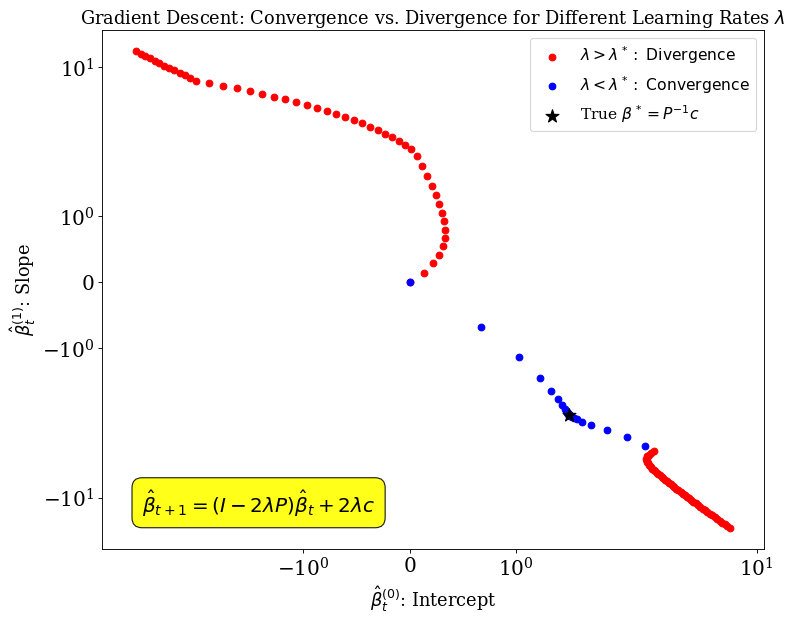

In [10]:
x_low_lim  = 1.5 * b0_array_div.min()
x_high_lim = 1.5 * b0_array_div.max()

y_low_lim  = 1.5 * b1_array_div.min()
y_high_lim = 1.5 * b1_array_div.max()

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# --- Scatter plots for convergence and divergence ---
ax.scatter(b0_array_div,  b1_array_div,  color="r", label=r"$\lambda>\lambda^*:~\mathrm{Divergence}$")
ax.scatter(b0_array_conv, b1_array_conv, color="b", label=r"$\lambda<\lambda^*:~\mathrm{Convergence}$")
ax.scatter(β[0], β[1], color='k', marker='*', s=150, label=r'True $\beta^* = P^{-1}c$')
equation = (
    r"$\hat{\beta}_{t+1} = (I-2\lambda P)\hat{\beta}_t + 2\lambda c$"
)


ax.text(
    0.06, 0.06,
    equation,
    transform=ax.transAxes,
    fontsize=18,
    verticalalignment='bottom',
    horizontalalignment='left',
    bbox=dict(
        boxstyle='round,pad=0.5',
        facecolor='yellow',
        edgecolor='black',
        alpha=0.9
    )
)



# --- Labels and Title ---
ax.set_xlabel(r'$\hat{\beta}^{(0)}_t$: Intercept', fontsize=16)
ax.set_ylabel(r'$\hat{\beta}^{(1)}_t$: Slope', fontsize=16)
ax.set_title(r"Gradient Descent: Convergence vs. Divergence for Different Learning Rates $\lambda$", fontsize=16)

# --- Axis limits ---
ax.set_xlim(x_low_lim, x_high_lim)
ax.set_ylim(y_low_lim, y_high_lim)

# --- Symmetric log scale ---
ax.set_xscale("symlog")
ax.set_yscale("symlog")

ax.legend()

plt.tight_layout()
plt.show()


## Making the animation

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio  # use v2 API to avoid warning

b0_array_div[:0]

array([], dtype=float64)

In [12]:
x_low_lim = 1.5 * b0_array_div.min()
x_high_lim = 1.5 * b0_array_div.max()
y_low_lim = 1.5 * b1_array_div.min()
y_high_lim = 1.5 * b1_array_div.max()

filenames = []

for i in range(num_steps):  # Start from 1 to avoid empty arrays
    for t in range(19):  # Your original t loop for slower animation
        # Create a new figure for each frame
        fig, ax = plt.subplots(1, 1, figsize=(10, 8))
        
        # --- Scatter plots for convergence and divergence ---
        ax.scatter(b0_array_div[:i], b1_array_div[:i], color="r", label=r"$\lambda>\lambda^*:~\mathrm{Divergence}$")
        ax.scatter(b0_array_conv[:i], b1_array_conv[:i], color="b", label=r"$\lambda<\lambda^*:~\mathrm{Convergence}$")
        ax.scatter(β[0], β[1], color='k', marker='*', s=150, label=r'True $\beta^* = P^{-1}c$')
        
        equation = r"$\hat{\beta}_{t+1} = (I-2\lambda P)\hat{\beta}_t + 2\lambda c$"
        loss_formula = (
            r"$\mathcal{L}(\beta) = \frac{1}{N} \sum_{i=1}^N "
            r"( y_i - \beta^{(0)} - \beta^{(1)} x_i )^2$"
        )

        general_gd = r"$\hat{\beta}_{t+1} = \hat{\beta}_t - \lambda \nabla_{\beta} \mathcal{L}(\hat{\beta}_t)$"
        
        ax.text(
            0.06, 0.06,
            equation,
            transform=ax.transAxes,
            fontsize=18,
            verticalalignment='bottom',
            horizontalalignment='left',
            bbox=dict(
                boxstyle='round,pad=0.5',
                facecolor='yellow',
                edgecolor='black',
                alpha=0.9
            )
        )

        ax.text(
            0.06, 0.24,  # Top formula
            general_gd,
            transform=ax.transAxes,
            fontsize=16,
            verticalalignment='bottom',
            horizontalalignment='left',
            bbox=dict(
                boxstyle='round,pad=0.5',
                facecolor='lightgreen',
                edgecolor='black',
                alpha=0.9
            )
        )
        
        ax.text(
            0.06, 0.4,  # Position above the gradient descent equation
            loss_formula,
            transform=ax.transAxes,
            fontsize=16,
            verticalalignment='bottom',
            horizontalalignment='left',
            bbox=dict(
                boxstyle='round,pad=0.5',
                facecolor='cyan',
                edgecolor='black',
                alpha=0.9
            )
        )

        
        
        # Add step counter as text in the plot
        ax.text(
            0.25, 0.7,  # Top right corner
            f"Step(t): {i}/{num_steps-1}",
            transform=ax.transAxes,
            fontsize=16,
            verticalalignment='top',
            horizontalalignment='right',
            bbox=dict(
                boxstyle='round,pad=0.3',
                facecolor='yellow',
                edgecolor='gray',
                alpha=0.8
            )
        )
        
        # --- Labels and Title ---
        ax.set_xlabel(r'$\hat{\beta}^{(0)}_t$: Intercept', fontsize=16)
        ax.set_ylabel(r'$\hat{\beta}^{(1)}_t$: Slope', fontsize=16)
        ax.set_title(r"Gradient Descent: Convergence vs. Divergence for Different Learning Rates $\lambda$", fontsize=16)
        
        # --- Axis limits ---
        ax.set_xlim(x_low_lim, x_high_lim)
        ax.set_ylim(y_low_lim, y_high_lim)
        
        # --- Symmetric log scale ---
        ax.set_xscale("symlog")
        ax.set_yscale("symlog")
        
        ax.legend()
        
        plt.tight_layout()
        
        filename = f'frame_{i:03d}_{t:02d}.png'
        plt.savefig(filename, dpi=100, bbox_inches='tight')
        filenames.append(filename)
        plt.close()  # Close each figure

# Build gif
with imageio.get_writer('GD.gif', mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

# Remove files
for filename in filenames:
    os.remove(filename)